# レコメンデーション（k近傍法）

In [1]:
import pandas as pd

## データの確認

### データの読み込み

In [2]:
df = pd.read_csv(r'sample_data\drink.csv')
df

,ユーザーID,飲み物名,評価値
0,1,紅茶,3.0
1,1,コーヒー,1.0
2,1,ジュース,2.0
3,1,ココア,2.5
4,1,日本茶,1.5
5,2,紅茶,3.0
6,2,コーヒー,3.0
7,2,ジュース,1.0
8,2,ココア,1.5
9,2,日本茶,2.0


### データのグラフ化
* bins：指定した項目を何分割にするか
* figsize：グラフの幅と高さ

<Axes: >

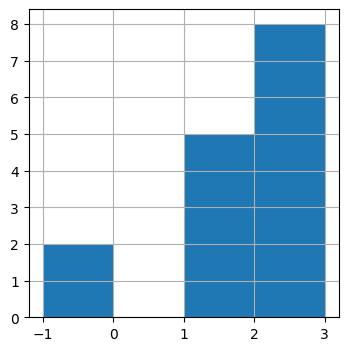

In [11]:
df['評価値'].hist(bins=4, figsize=(4, 4))

## モデルの作成

### データフレームをクロス集計表に変換する

In [14]:
pivot = df.pivot(index='飲み物名', columns='ユーザーID', values='評価値')
pivot

ユーザーID,1,2,3
飲み物名,,,
ココア,2.5,1.5,-1.0
コーヒー,1.0,3.0,3.0
ジュース,2.0,1.0,-1.0
日本茶,1.5,2.0,1.0
紅茶,3.0,3.0,2.0


### レコメンデーションモデルの作成

In [15]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors()
knn.fit(pivot)

NearestNeighbors()

## 予測の実行

In [16]:
coffee_id = 1
indice = knn.kneighbors(pivot, return_distance=False)
rec_id = indice[coffee_id][1]
print(f'コーヒーが好きな人へのおすすめ：{pivot.index.to_numpy()[rec_id]}')

コーヒーが好きな人へのおすすめ：紅茶
